In this example, we use the make_moons function to generate a synthetic dataset with two classes of points, which are arranged in the shape of two interleaved crescent moons. The dataset has two features and the points cannot be separated by a linear boundary.

We use the PolynomialFeatures class from scikit-learn to generate polynomial features of degree 2 from the original features. Then we use a logistic regression algorithm to train the model using the expanded feature set.

We evaluate the model's performance on the test dataset, and plot the decision boundary of the model.

You can change the degree of the polynomial to observe how this affects the accuracy and the decision boundary of the model. Also, you can try with different classification algorithms and see the results.

Accuracy: 70.00%


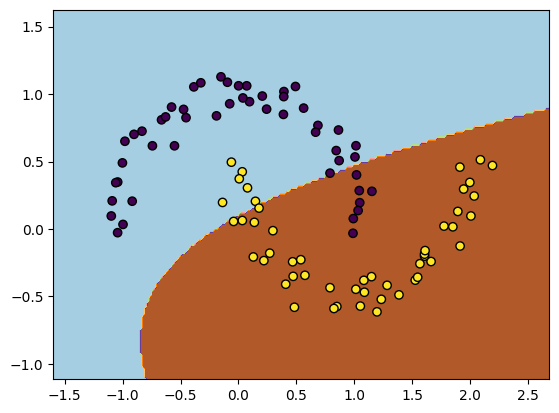

In [1]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Generate dataset
X, y = make_moons(n_samples=100, noise=0.1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a logistic regression model
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test_poly)

# Print the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

# Plot the decision boundary of the model
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
plt.show()